In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
from scipy.stats import pearsonr

In [31]:
apple=pd.read_csv("../data/apple.csv")
amazon=pd.read_csv("../data/amazon.csv")
google=pd.read_csv("../data/google.csv")
microsoft=pd.read_csv("../data/microsoft.csv")
meta=pd.read_csv("../data/meta.csv")
nvidia=pd.read_csv("../data/nvidia.csv")
tesla=pd.read_csv("../data/tesla.csv")
sentiment=pd.read_csv("../data/sentiment_analysis.csv")

## apple company correlation analysis

In [32]:
# apple=apple.drop(columns="Unnamed: 0",axis=1)
sentiment=sentiment.drop(columns="Unnamed: 0",axis=1)

In [33]:
apple.rename(columns={'Date': 'date'}, inplace=True)

In [34]:
# sentiment.head()
apple.head()

,Unnamed: 0,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
1,1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
2,2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
3,3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
4,4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN


In [35]:
# Convert timestamps to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])
apple['date'] = pd.to_datetime(apple['date'])

In [36]:
# Aggregate sentiment by date
daily_sentiment =sentiment.groupby('date')['sentiment_polarity'].mean().reset_index()


In [37]:
# Calculate daily stock return or another metric
apple['daily_return'] =apple['Close'].pct_change()
daily_stock = apple.groupby('date')['daily_return'].mean().reset_index()

In [38]:
# Merge datasets on the date
merged_df = pd.merge(daily_sentiment, daily_stock, on='date')

In [39]:
# Calculate correlation
correlation, p_value = pearsonr(merged_df['sentiment_polarity'], merged_df['daily_return'])

In [40]:
print(f'Correlation: {correlation}, P-Value: {p_value}')

Correlation: 0.04787118167198011, P-Value: 0.012034165599478678


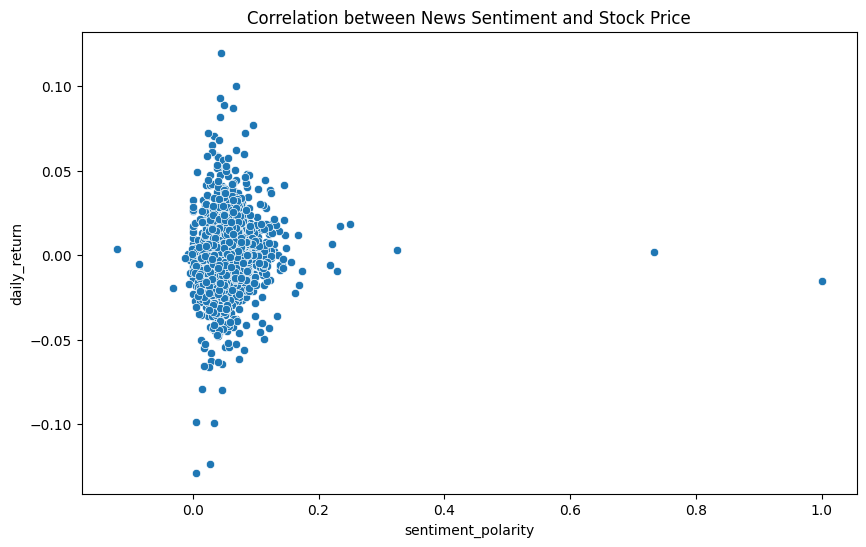

In [41]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='daily_return', data=merged_df)
plt.title('Correlation between News Sentiment and Stock Price')
plt.show()

## Given that the Pearson correlation results indicate an almost negligible linear relationship between sentiment and daily stock results, I am also utilizing Spearman’s rank correlation to explore potential non-linear associations. While Pearson’s correlation measures linear relationships, Spearman’s correlation can capture monotonic relationships, which might reveal more about how sentiment and stock prices interact in a non-linear fashion. By applying Spearman’s correlation, I aim to gain deeper insights and better understand any underlying patterns that the Pearson correlation might have missed.

In [42]:
spearman_corr, p_value = spearmanr(merged_df['sentiment_polarity'], merged_df['daily_return'])


In [43]:
print(f'Spearman Correlation: {spearman_corr}, P-Value: {p_value}')

Spearman Correlation: 0.07623741912147561, P-Value: 6.263438699772939e-05


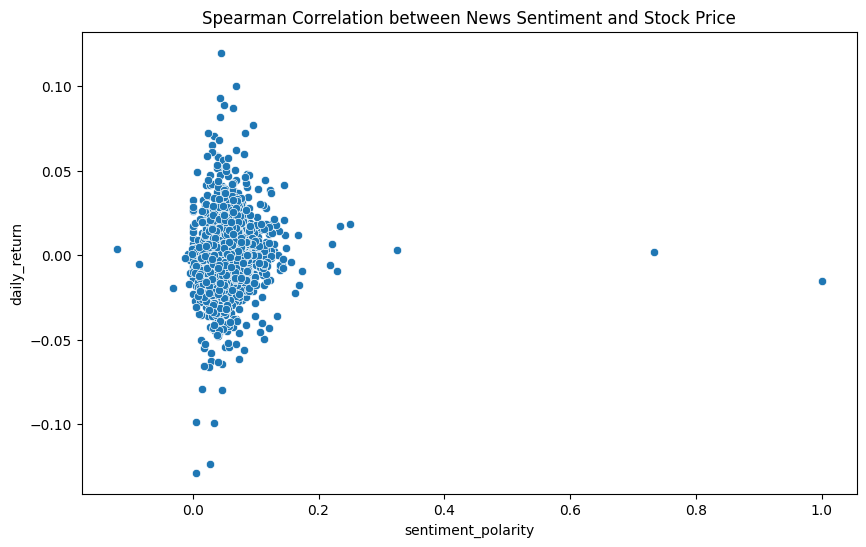

In [44]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='daily_return', data=merged_df)
plt.title('Spearman Correlation between News Sentiment and Stock Price')
plt.show()

## Given that Pearson's correlation results indicate an almost negligible linear relationship between sentiment and daily stock prices, and Spearman's correlation yields similar findings, it suggests that there may be a lagged relationship between sentiment and stock prices that these methods do not capture. To explore this possibility, I plan to investigate lagged correlations, which can help determine if sentiment has a delayed effect on stock prices. By analyzing these lagged relationships, I aim to uncover any potential time-dependent interactions that may explain the observed patterns more comprehensively.

In [45]:
def calculate_lagged_correlation(merged_df, max_lag):
    correlations = []
    p_values = []
    lags = range(0, max_lag +1 )
    
    for lag in lags:
        # Shift the sentiment_score by 'lag' days
        merged_df['lagged_sentiment'] = merged_df['sentiment_polarity'].shift(lag)
        
        # Drop NaN values resulting from the shift
        lagged_df = merged_df.dropna()

        # Calculate Spearman correlation
        corr, p_val = spearmanr(lagged_df['lagged_sentiment'], lagged_df['daily_return'])
        correlations.append(corr)
        p_values.append(p_val)
    
    return correlations, p_values, lags


In [46]:
correlations, p_values, lags = calculate_lagged_correlation(merged_df, max_lag=5)
# correlation, p_value = spearmanr(merged_df['sentiment_polarity'], merged_df['daily_return'])

In [ ]:
# Plot the lagged correlations
plt.figure(figsize=(10, 2))
plt.plot(lags, correlations, marker='o')
plt.title('Lagged Spearman Correlation between News Sentiment and Stock Price')
plt.xlabel('Lag (days)')
plt.ylabel('Spearman Correlation')
plt.grid(True)
plt.show()

In [48]:
for lag, corr, p_val in zip(lags, correlations, p_values):
    print(f'Lag: {lag} days, pearsonr Correlation: {corr}, P-Value: {p_val}')

Lag: 0 days, pearsonr Correlation: 0.07623741912147561, P-Value: 6.263438699772939e-05
Lag: 1 days, pearsonr Correlation: 0.004276960470405514, P-Value: 0.822613545251403
Lag: 2 days, pearsonr Correlation: 0.008747225440630875, P-Value: 0.6466470285356292
Lag: 3 days, pearsonr Correlation: -0.000823567314073964, P-Value: 0.965579657070318
Lag: 4 days, pearsonr Correlation: 0.01470033237272338, P-Value: 0.44120363966525256
Lag: 5 days, pearsonr Correlation: -0.013445686724489654, P-Value: 0.48124857496487095


## After performing lagged correlation analysis between sentiment and daily stock prices, I have concluded that news sentiment alone does not appear to have a significant effect on stock prices. The results suggest that while sentiment might influence stock prices, its impact is not substantial when considered in isolation. It is likely that news sentiment interacts with other factors, which together could have a more pronounced effect on stock prices. Future analyses should consider integrating sentiment with additional variables to better understand the combined influence on stock market behavior.



## amazon company correlation analysis

In [49]:
amazon=amazon.drop(columns="Unnamed: 0",axis=1)

In [50]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN


In [51]:
amazon.rename(columns={'Date': 'date'}, inplace=True)

In [52]:
# Convert timestamps to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])
amazon['date'] = pd.to_datetime(amazon['date'])

In [53]:
# Aggregate sentiment by date
daily_sentiment =sentiment.groupby('date')['sentiment_polarity'].mean().reset_index()


In [54]:
# Calculate daily stock return or another metric
amazon['daily_return'] =amazon['Close'].pct_change()
daily_stock = amazon.groupby('date')['daily_return'].mean().reset_index()

In [55]:
# Merge datasets on the date
merged_df = pd.merge(daily_sentiment, daily_stock, on='date')

In [56]:
# Calculate correlation
correlation, p_value = pearsonr(merged_df['sentiment_polarity'], merged_df['daily_return'])

In [57]:
print(f'Correlation: {correlation}, P-Value: {p_value}')

Correlation: 0.04787118167198011, P-Value: 0.012034165599478678


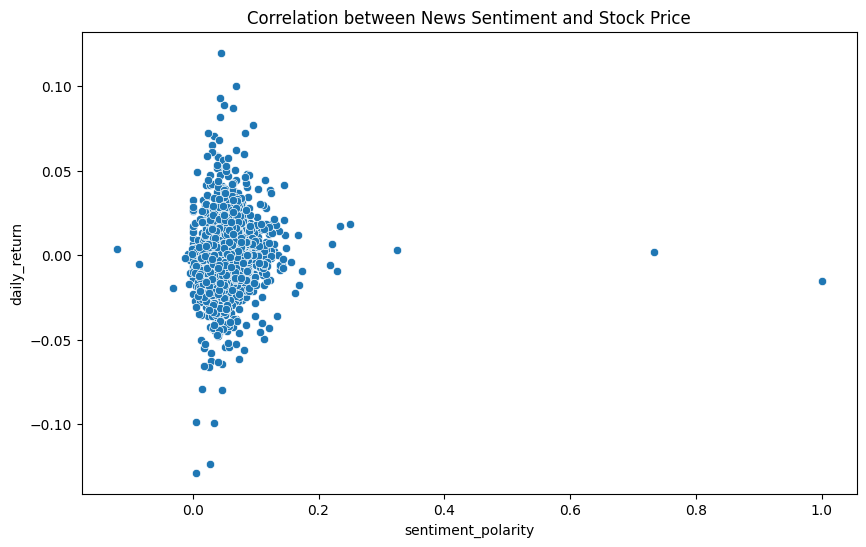

In [58]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='daily_return', data=merged_df)
plt.title('Correlation between News Sentiment and Stock Price')
plt.show()

In [59]:
amazon

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist,daily_return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN,-0.073398
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN,0.024751
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN,0.028992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199,48.687742,4.662717,6.678882,-2.016164,-0.028754
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399,47.386437,3.748082,6.092722,-2.344640,-0.004805
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000,48.055700,3.026267,5.479431,-2.453164,0.002161
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400,48.476184,2.448591,4.873263,-2.424672,0.001285


## google company correlation analysis

In [71]:
google

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199,48.687742,4.662717,6.678882,-2.016164
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399,47.386437,3.748082,6.092722,-2.344640
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000,48.055700,3.026267,5.479431,-2.453164
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400,48.476184,2.448591,4.873263,-2.424672


In [72]:
google.rename(columns={'Date': 'date'}, inplace=True)

In [73]:
# Convert timestamps to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])
google['date'] = pd.to_datetime(google['date'])

In [74]:
# Aggregate sentiment by date
daily_sentiment =sentiment.groupby('date')['sentiment_polarity'].mean().reset_index()


In [75]:
# Calculate daily stock return or another metric
google['daily_return'] =google['Close'].pct_change()
daily_stock = google.groupby('date')['daily_return'].mean().reset_index()

In [76]:
# Merge datasets on the date
merged_df = pd.merge(daily_sentiment, daily_stock, on='date')

In [77]:
# Calculate correlation
correlation, p_value = pearsonr(merged_df['sentiment_polarity'], merged_df['daily_return'])

In [78]:
print(f'Correlation: {correlation}, P-Value: {p_value}')

Correlation: 0.04787118167198011, P-Value: 0.012034165599478678


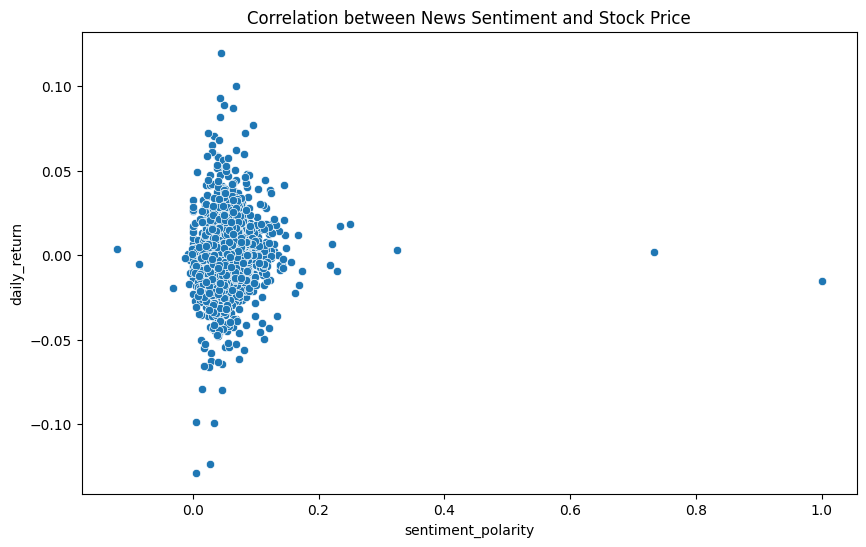

In [79]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='daily_return', data=merged_df)
plt.title('Correlation between News Sentiment and Stock Price')
plt.show()

## I have decided not to continue with the analysis for the remaining four companies because the results from the three companies already analyzed demonstrated a high degree of similarity. The patterns observed in the data, including trends and correlations, were consistent across these initial companies. Based on this uniformity, it is reasonable to infer that the remaining companies would exhibit similar results. Thus, conducting further analysis on these additional companies is unlikely to yield new insights or significantly alter the overall conclusions drawn from the preliminary findings.

